Fibonacci numbers.
$$
F(0) = 0 
$$
$$
F(1) = 1
$$
$$
F(n) = F(n-1) + F(n-2)
$$

In [2]:
def recfib(n):
    if n<=1:
        return n
    else:
        return recfib(n-1)+recfib(n-2)

F = [recfib(i) for i in range(15)]
print(F)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


Copmutation of pi using Monte Carlo method:<br>
Imagine a circle inscribed into the square; the idea is to use the ratio of number points that lie inside the circle (Ninside) to the total number of generated points to compute pi. Why does it work?<br>
The problability that a point falls inside the circle is directly proportional to the area of the circle i.e.
$$
\frac{Ninside}{N} = \frac{Area_{circle}}{Area_{square}}
$$
Moreover we know that area of the square is 4 while that of circle is pi. The ratio of these two areas is:
$$
\frac{Area_{circle}}{Area_{square}} = \frac{\pi}{4}
$$
we can compute pi as
$$
\pi = 4\frac{Ninside}{N}
$$

In [9]:
import math as mt
import random

def compute_pi_mc(N):
    circle_points = 0
    square_points = 0

    for i in range(N):
        rand_x = random.uniform(-1, 1)
        rand_y = random.uniform(-1, 1)

        dist = mt.sqrt(rand_x**2 + rand_y**2)

        if dist <= 1:
            circle_points += 1
        
        square_points += 1
    
    pi_est = 4.0 * circle_points / square_points

    return pi_est

print(compute_pi_mc(10000000))

3.1412748


Let us now try to visualize the procedure. In order to obtain this result we modify the function so that the output is given by:<br>
-The estimated value of pi.<br>
-The x and y coordinates of the points inside the circle.<br>
-The x and y coordinates of the points outside the circle.<br>
-The vector containing all the iterates of the estimated value of pi.<br>

In [10]:
import math as mt
import random
import numpy as np

def compute_pi_mc_g(N):
    
    circle_points = 0
    square_points = 0
    x_in = []
    y_in = []
    x_out = []
    y_out = []
    vec_pi_est = np.empty([N])

    for i in range(N):
        rand_x = random.uniform(-1, 1)
        rand_y = random.uniform(-1, 1)

        dist = mt.sqrt(rand_x**2 + rand_y**2)

        if dist <= 1:
            circle_points += 1
            x_in = x_in + [rand_x]
            y_in = y_in + [rand_y]
        else:
            x_out.append(rand_x)
            y_out.append(rand_y)
        
        square_points += 1

        pi_est = 4.0 * circle_points / square_points
        vec_pi_est[i] = pi_est
    
    return pi_est, x_in, y_in, x_out, y_out, vec_pi_est

N = 1000
pi_est, x_in, y_in, x_out, y_out, vec_pi_est = compute_pi_mc_g(N)

Now we have to plot the obtained data. The module of Python for plotting is Matplotlib.

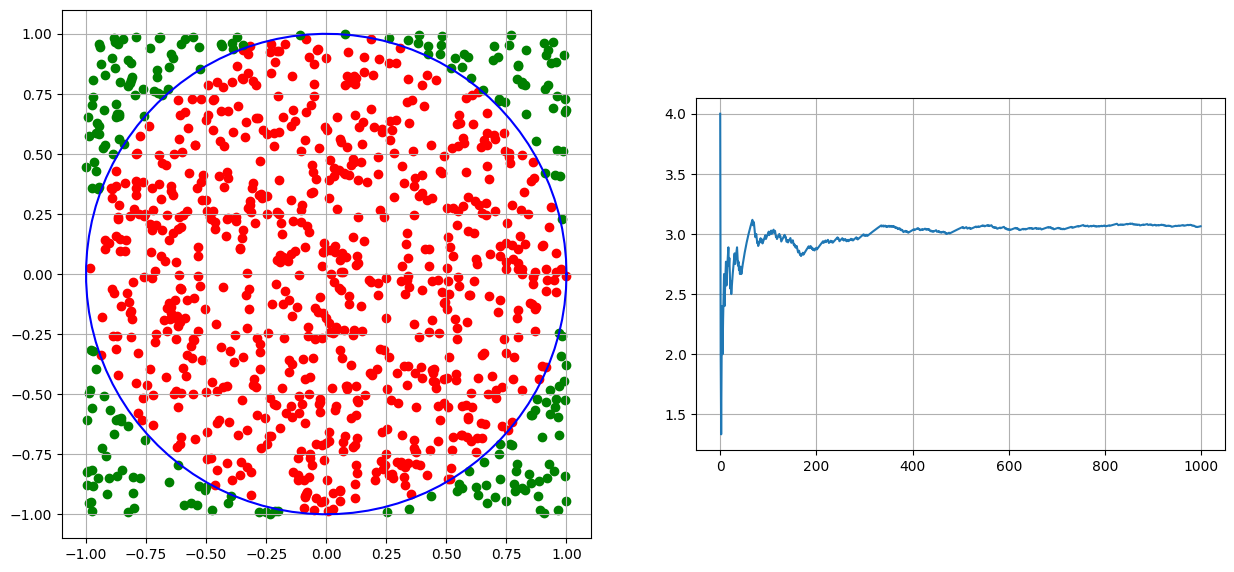

In [15]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

g = np.linspace(0, 10, 20)
type(g)
np.cos(g)

plt.rcParams['figure.figsize'] = [15, 15]
fig, (ax1, ax2) = plt.subplots(1, 2)

#Draw a unit circle centered at the origin
angles = np.linspace(0 * np.pi, 2 * np.pi, 100)
xs = np.cos(angles)
ys = np.sin(angles)
ax1.set_aspect(1)
ax1.plot(xs, ys, color = 'blue')

#Draw the points
x_in = np.array(x_in)
y_in = np.array(y_in)
x_out = np.array(x_out)
y_out = np.array(y_out)
ax1.scatter(x_in, y_in, c = 'r')
ax1.scatter(x_out, y_out, c = 'g')
ax1.grid()

ax2.grid()
ax2.plot(vec_pi_est)
ax2.set_aspect(250)